In [12]:
#imports

import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
os.chdir('E:\PROJECTS\dsmlbc\Diabetes')

In [14]:
def load_Diabetes_data():
    data = pd.read_csv(r"datasets\diabetes.csv")

    return data

In [15]:
df = load_Diabetes_data()

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [17]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [20]:
df.shape

(768, 9)

In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [23]:
df.isnull().values.any()

False

Numerical Variables Count:  9


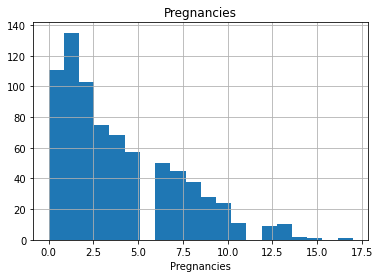

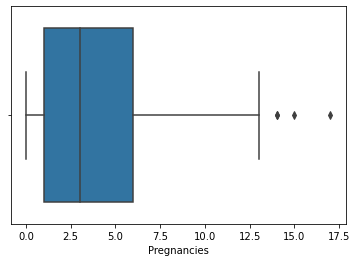

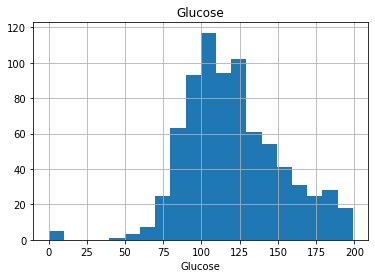

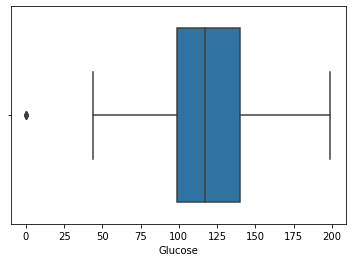

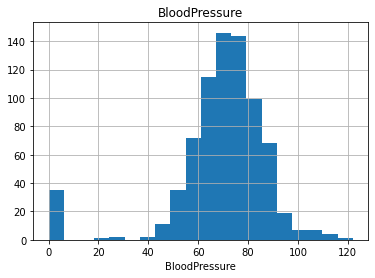

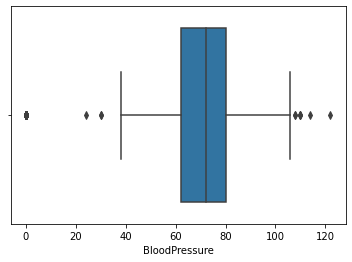

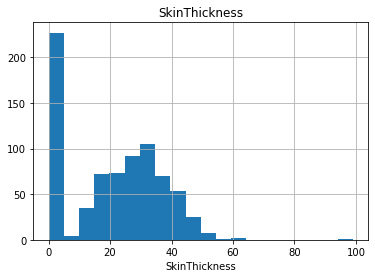

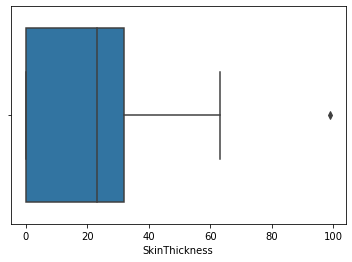

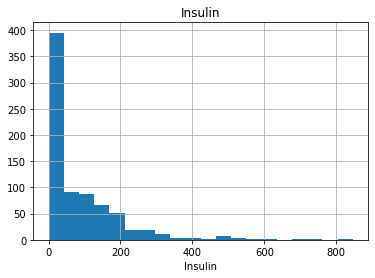

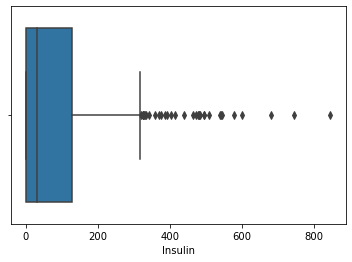

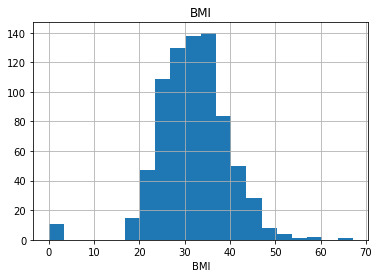

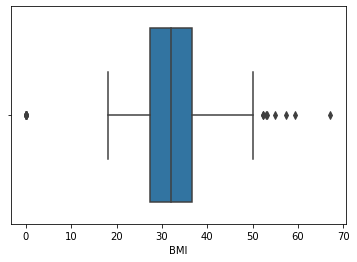

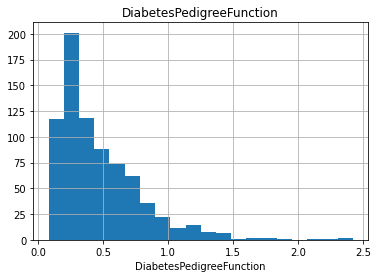

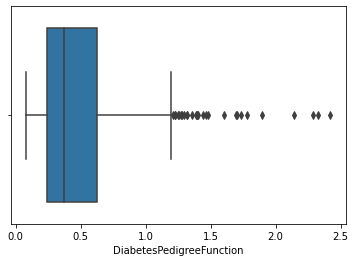

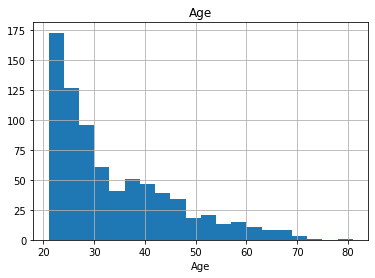

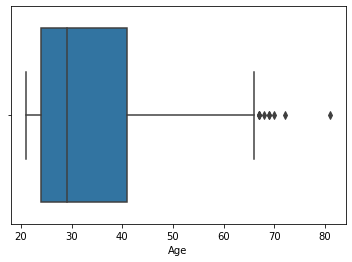

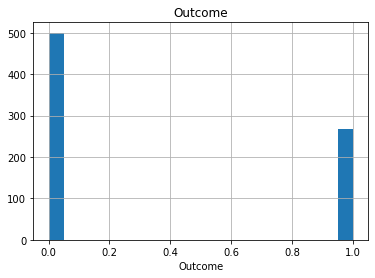

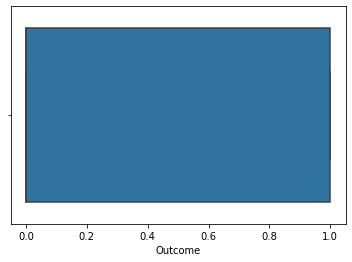

9 variables have been plotted


In [24]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
print('Numerical Variables Count: ', len(num_cols))

def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        sns.boxplot(x=df[col]);
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)

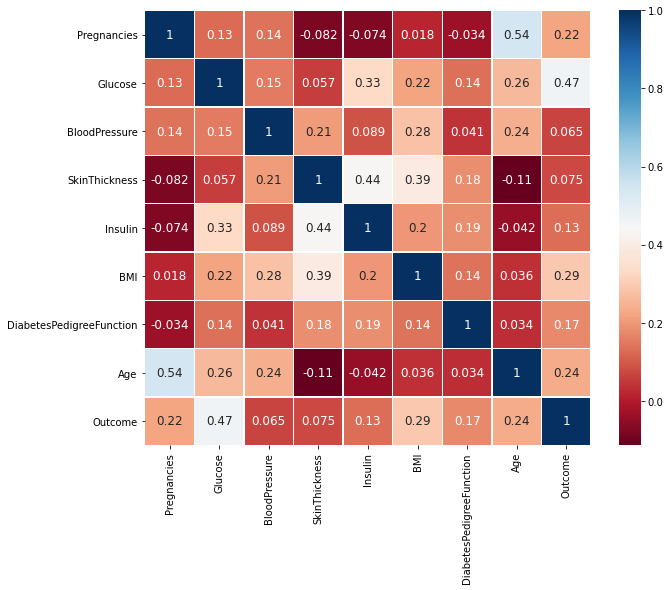

In [15]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w',
                      cmap='RdBu')
    plt.show()


correlation_matrix(df, num_cols)

In [16]:
# TARGET ANALYSE

def find_correlation(dataframe, corr_limit=0.30):
    high_correlations = []
    low_correlations = []
    for col in num_cols:
        if col == "Outcome":
            pass

        else:
            correlation = dataframe[[col, "Outcome"]].corr().loc[col, "Outcome"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col)
            else:
                low_correlations.append(col)
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df)

print('Variables have low correlation with target:')
print('-' * 44)
print(low_corrs)
print('Variables have high correlation with target:')
print('-' * 44)
print(high_corrs)

Pregnancies 0.2218981530339883
Glucose 0.4665813983068757
BloodPressure 0.06506835955033308
SkinThickness 0.07475223191831948
Insulin 0.13054795488404808
BMI 0.29269466264444666
DiabetesPedigreeFunction 0.17384406565296076
Age 0.23835598302719743
Variables have low correlation with target:
--------------------------------------------
['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Variables have high correlation with target:
--------------------------------------------
['Glucose']


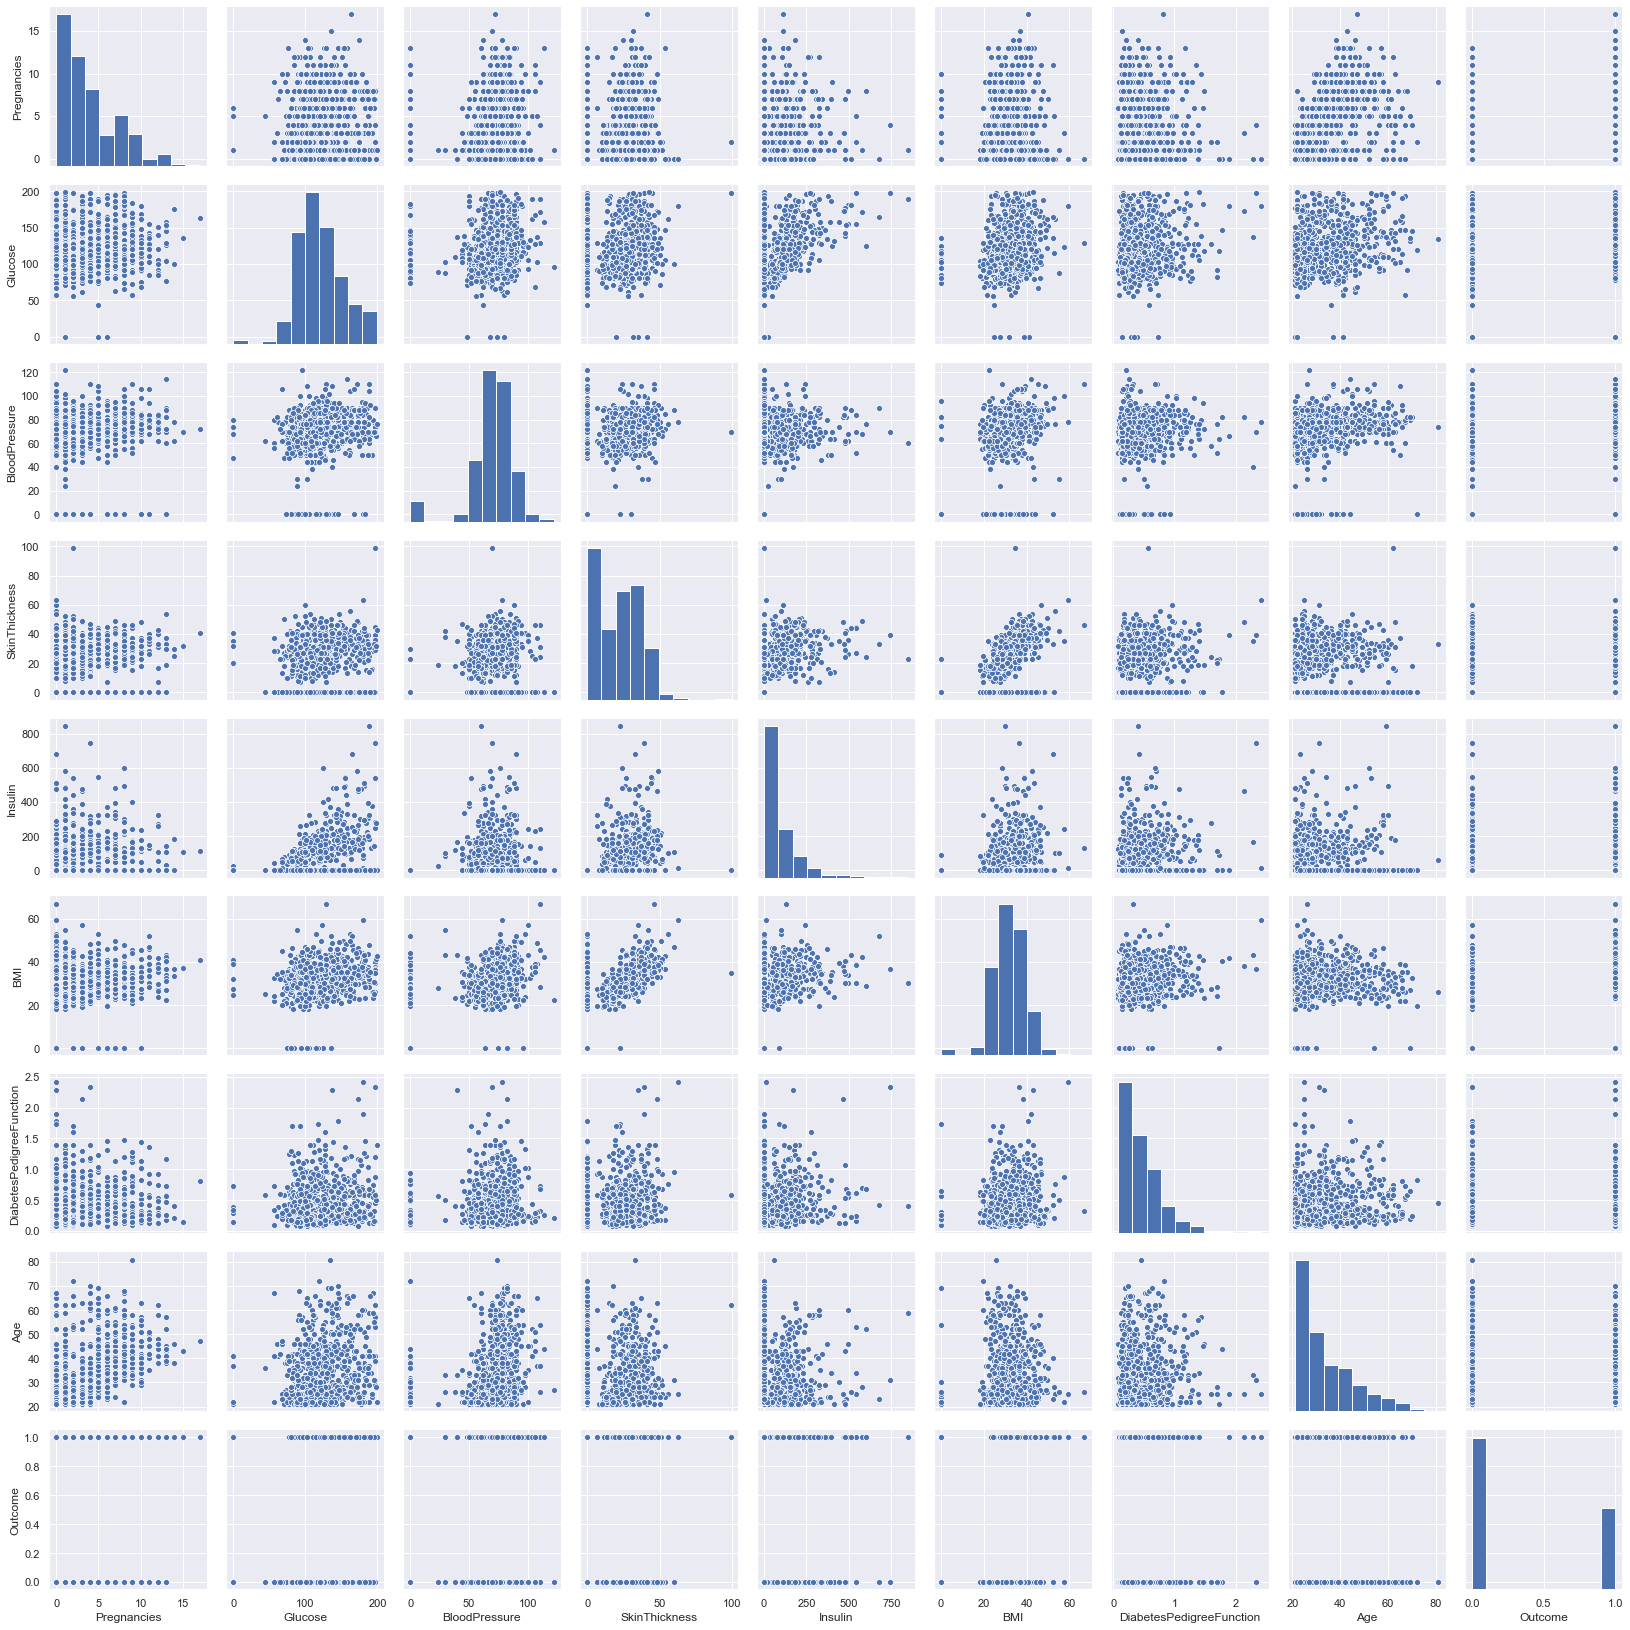

In [17]:
# Pairplot of variables with target data

sns.set()
sns.pairplot(df, height=2.5)
plt.show()

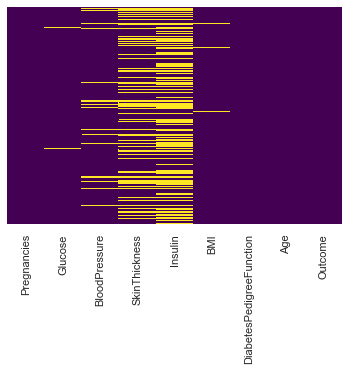

In [18]:
# MISSING VALUES

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # missing value check